<a href="https://colab.research.google.com/github/joaquinvvelaco/diplo-datos-2022/blob/main/intro-ml/entregables/Grupo_29_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/adrian-alejandro/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

X = X[['LOAN', 'VALUE', 'DELINQ', 'CLNO', 'DEBTINC']]

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Clases target
pred_classes = ['client defaulted', 'loan repaid']


TARGET     0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Funciones Compartidas

Funciones utilizadas en ejercicios 2 y 3

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection  import GridSearchCV
from IPython.display import display


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure().clear()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')
    

def report_metrics(y_true, y_predicted, cm_labels, description=None):
  """Prints values of selected metrics for a pair of true and predicted targets.
  """
  if description:
    print(description)

  print("\tAccuracy (exactitud):  %.2f" % accuracy_score(y_true, y_predicted))
  print("\tPrecision (precisión):  %.2f" % precision_score(y_true, y_predicted))
  print("\tRecall (cobertura/exhaustividad):  %.2f" % 
        recall_score(y_true, y_predicted))
  print("\tF1:  %.2f" % f1_score(y_true, y_predicted))

  cm = confusion_matrix(y_true, y_predicted)
  
  plot_confusion_matrix(cm, cm_labels, 
                        title=f"Confusion matrix ({description})")
  


def format_results(results, params):
  results_df = pd.DataFrame(results)
  cols = ['param_' + param for param in params.keys()] 
  cols += ['mean_test_score', 'std_test_score']
  results_df = results_df[cols].sort_values(by='mean_test_score', 
                                            ascending=False)
  return results_df


def adjust_hyperparameters(X_train, y_train, estimator, params, cv=5,
                           print_values=False, print_results=True,
                           print_best=True):
    """
    This function searches for the best parameters given an estimator and 
    parameter grid values.
    """
    grid_cv = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        cv=cv,
        n_jobs=5, refit=True, return_train_score=True, verbose=1)

    # Fit to the training data
    grid_cv.fit(X_train, y_train)

    best_params = grid_cv.best_params_

    if print_values:
      # Print the values used for hyperparameters
      print(f"""
      The values used for the hyperparameters:
      {grid_cv.cv_results_}
      """)

    if print_best:
      # Print best score and params
      print("\nMejor configuración:")
      display(pd.DataFrame([best_params]))
      print("\nAccuracy promedio (mejor configuración) %.3f" % grid_cv.best_score_)

    if print_results:
      results = format_results(grid_cv.cv_results_, params)
      print("\nAccuracy promedio y varianza para todas las configuraciones "
      "(ordernadas en forma descendiente):")
      display(results)

    return best_params

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1.   El conjunto de datos contiene información de historial crediticio de quienes recibieron un prestamo con garantia hipotecaria.
2.   La variable objetivo es la factibilidad de pagar o no el prestamo en base al historial crediticio.

3. Atributos:
    
*   TARGET  = Label: 1 = client defaulted on loan - 0 = loan repaid
*   LOAN    = Amount of the loan request
*   MORTDUE = Amount due on existing mortgage
*   VALUE   = Value of current property
*   YOJ     = Years at present job
*   DEROG   = Number of major derogatory reports
*   DELINQ  = Number of delinquent credit lines
*   CLAGE   = Age of oldest trade line in months
*   NINQ    = Number of recent credit lines
*   CLNO    = Number of credit lines
*   DEBTINC = Debt-to-income ratio

4.  Atributos: LOAN, VALUE, DELINQ, CLNO y DEBTINC ya que sabiendo la cantidad de creditos tomados, creditos morosos, liquides para pagar y el precio de la propiedad a poner en garantia podremos predecir la factibilidad de pagar el prestamo. 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
#Se analizan datos faltantes para realizar su imputación


#Datos faltantes
print('TRAIN SET MISSING VALUES:')
print(X_train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(X_test.isna().sum())

#No se detectan datos faltantes por lo que se procede con los modelos

TRAIN SET MISSING VALUES:
LOAN       0
VALUE      0
DELINQ     0
CLNO       0
DEBTINC    0
dtype: int64

TEST SET MISSING VALUES:
LOAN       0
VALUE      0
DELINQ     0
CLNO       0
DEBTINC    0
dtype: int64


Conjunto de entrenamiento
	Accuracy (exactitud):  0.85
	Precision (precisión):  0.61
	Recall (cobertura/exhaustividad):  0.35
	F1:  0.44
Conjunto de evaluación
	Accuracy (exactitud):  0.86
	Precision (precisión):  0.62
	Recall (cobertura/exhaustividad):  0.31
	F1:  0.41


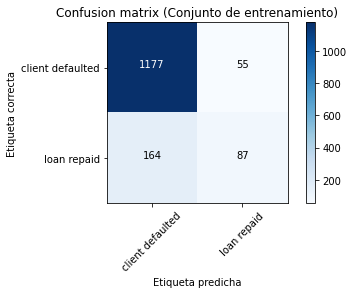

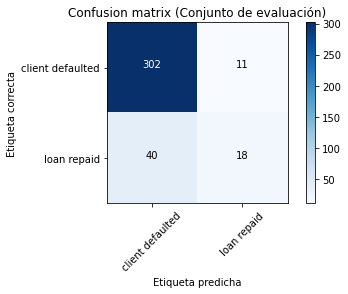

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler



#Scaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data


# Fitting SGD Classifier to the Training set
model = SGDClassifier(random_state=1221)

model.fit(X_train, y_train)
# Predicting the results
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


report_metrics(y_train, y_pred_train, pred_classes,
               description="Conjunto de entrenamiento")

report_metrics(y_test, y_pred_test, pred_classes, 
               description="Conjunto de evaluación")


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:

parameter_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.01, 0.05, 0.1, 0.15, 0.2],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(random_state=1221)

best_params = adjust_hyperparameters(X_train, y_train, model, parameter_grid)

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Mejor configuración:


,alpha,loss,penalty
0,0.1,log,none



Accuracy promedio (mejor configuración) 0.856

Accuracy promedio y varianza para todas las configuraciones (ordernadas en forma descendiente):


,param_loss,param_alpha,param_penalty,mean_test_score,std_test_score
29,log,0.1,none,0.855699,0.007798
4,log,0.01,l1,0.855023,0.008811
10,modified_huber,0.01,l1,0.855021,0.011721
11,modified_huber,0.01,none,0.854350,0.009633
3,log,0.01,l2,0.854345,0.008974
38,hinge,0.15,none,0.854345,0.008974
41,log,0.15,none,0.853679,0.008633
7,squared_hinge,0.01,l1,0.853676,0.009666
8,squared_hinge,0.01,none,0.853674,0.010164
17,log,0.05,none,0.853005,0.008075


Conjunto de entrenamiento
	Accuracy (exactitud):  0.86
	Precision (precisión):  0.74
	Recall (cobertura/exhaustividad):  0.23
	F1:  0.35
Conjunto de evaluación
	Accuracy (exactitud):  0.87
	Precision (precisión):  0.87
	Recall (cobertura/exhaustividad):  0.22
	F1:  0.36


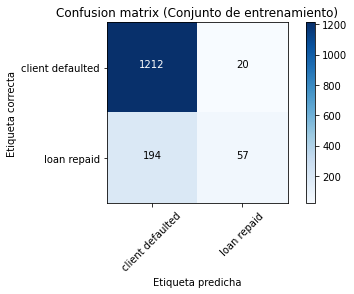

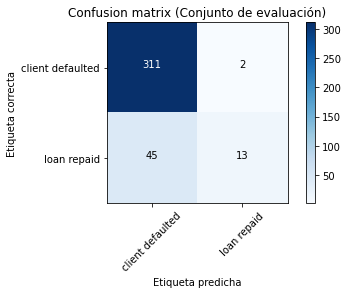

In [ ]:
model.set_params(**best_params)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

report_metrics(y_train, y_pred_train, pred_classes,
               description="Conjunto de entrenamiento")

report_metrics(y_test, y_pred_test, pred_classes, 
               description="Conjunto de evaluación")

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Conjunto de entrenamiento
	Accuracy (exactitud):  1.00
	Precision (precisión):  1.00
	Recall (cobertura/exhaustividad):  1.00
	F1:  1.00
Conjunto de evaluación
	Accuracy (exactitud):  0.87
	Precision (precisión):  0.59
	Recall (cobertura/exhaustividad):  0.55
	F1:  0.57


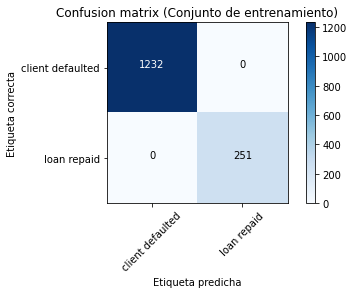

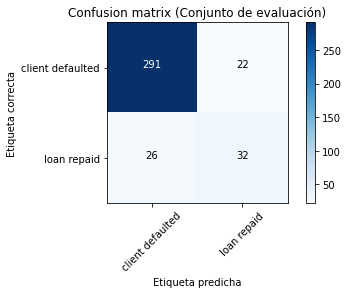

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

report_metrics(y_train, y_pred_train, pred_classes,
               description="Conjunto de entrenamiento")

report_metrics(y_test, y_pred_test, pred_classes, 
               description="Conjunto de evaluación")

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:

parameter_grid = {
    'criterion': ['gini', 'entropy'], # log_loss tira error
    'max_depth': np.arange(5, 20, 5),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['log2', 'sqrt']
}

dtc = DecisionTreeClassifier(random_state=42)

best_params = adjust_hyperparameters(X_train, y_train, dtc, parameter_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Mejor configuración:


,criterion,max_depth,max_features,min_samples_leaf
0,gini,10,log2,3



Accuracy promedio (mejor configuración) 0.879

Accuracy promedio y varianza para todas las configuraciones (ordernadas en forma descendiente):


,param_criterion,param_max_depth,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score
14,gini,10,3,sqrt,0.878631,0.015177
10,gini,10,3,log2,0.878631,0.015177
37,entropy,10,2,sqrt,0.877944,0.008180
33,entropy,10,2,log2,0.877944,0.008180
32,entropy,10,1,log2,0.874588,0.010858
36,entropy,10,1,sqrt,0.874588,0.010858
21,gini,15,2,sqrt,0.873246,0.018700
17,gini,15,2,log2,0.873246,0.018700
19,gini,15,4,log2,0.873232,0.014078
23,gini,15,4,sqrt,0.873232,0.014078


Conjunto de entrenamiento
	Accuracy (exactitud):  0.91
	Precision (precisión):  0.97
	Recall (cobertura/exhaustividad):  0.50
	F1:  0.66
Conjunto de evaluación
	Accuracy (exactitud):  0.90
	Precision (precisión):  0.89
	Recall (cobertura/exhaustividad):  0.43
	F1:  0.58


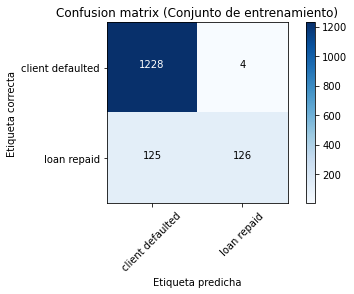

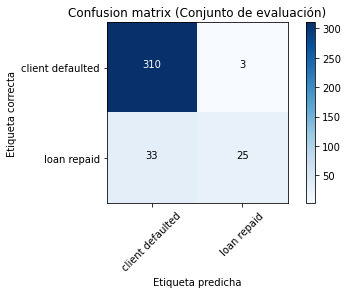

In [ ]:
# Evaluamos para la mejor configuración encontrada:

dtc.set_params(**best_params)

dtc.fit(X_train, y_train)

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

report_metrics(y_train, y_pred_train, pred_classes,
               description="Conjunto de entrenamiento")

report_metrics(y_test, y_pred_test, pred_classes, 
               description="Conjunto de evaluación")